### Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, precision_recall_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ReduceLROnPlateau, EarlyStopping



### Import data

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Data Visualization

In [ ]:
sns.set()

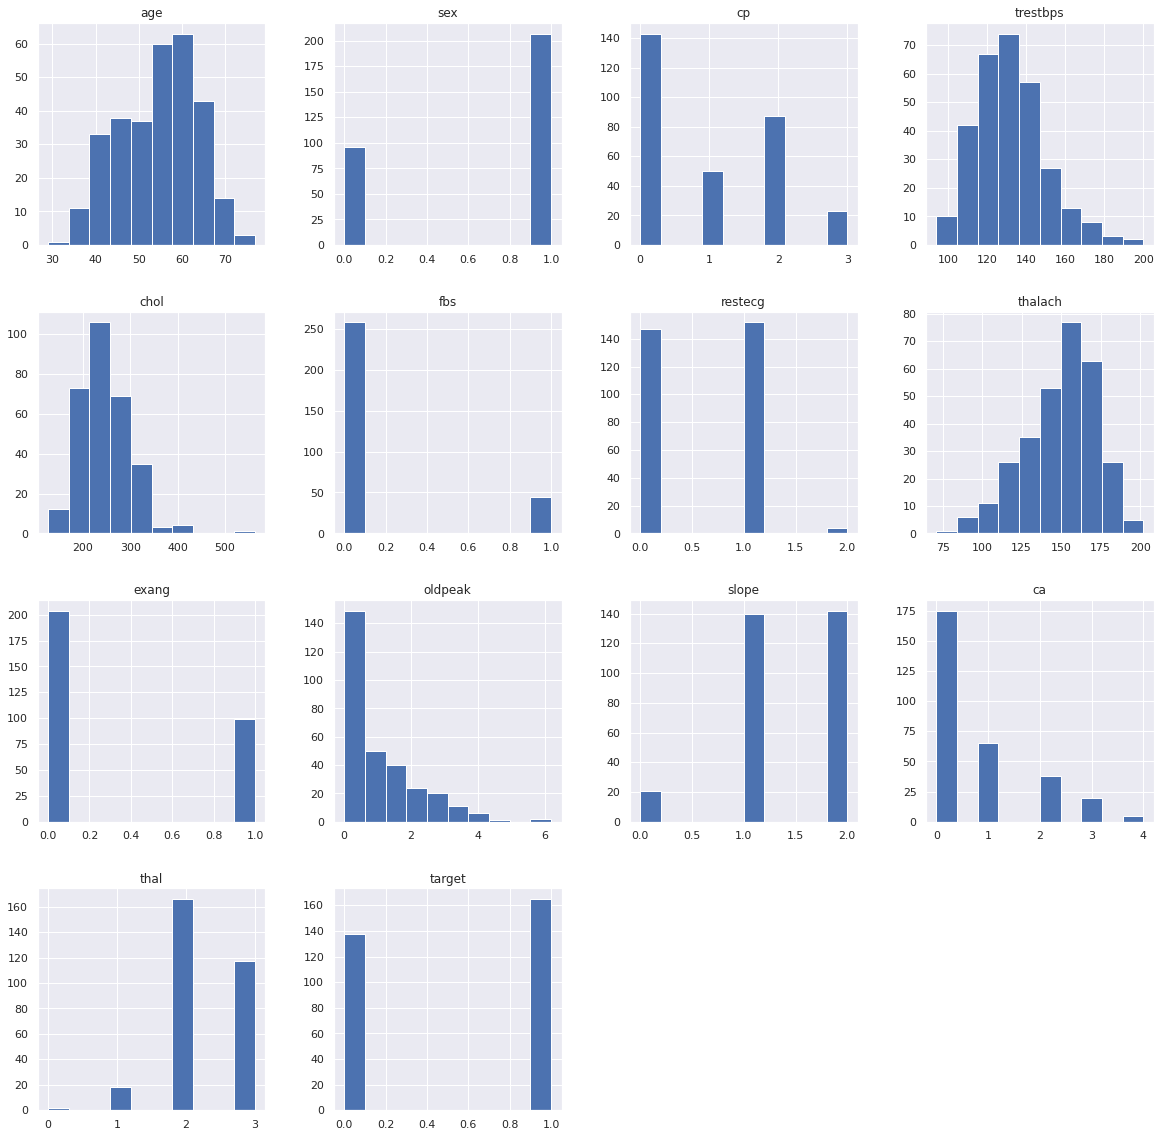

In [ ]:
df.hist(figsize=(20, 20));

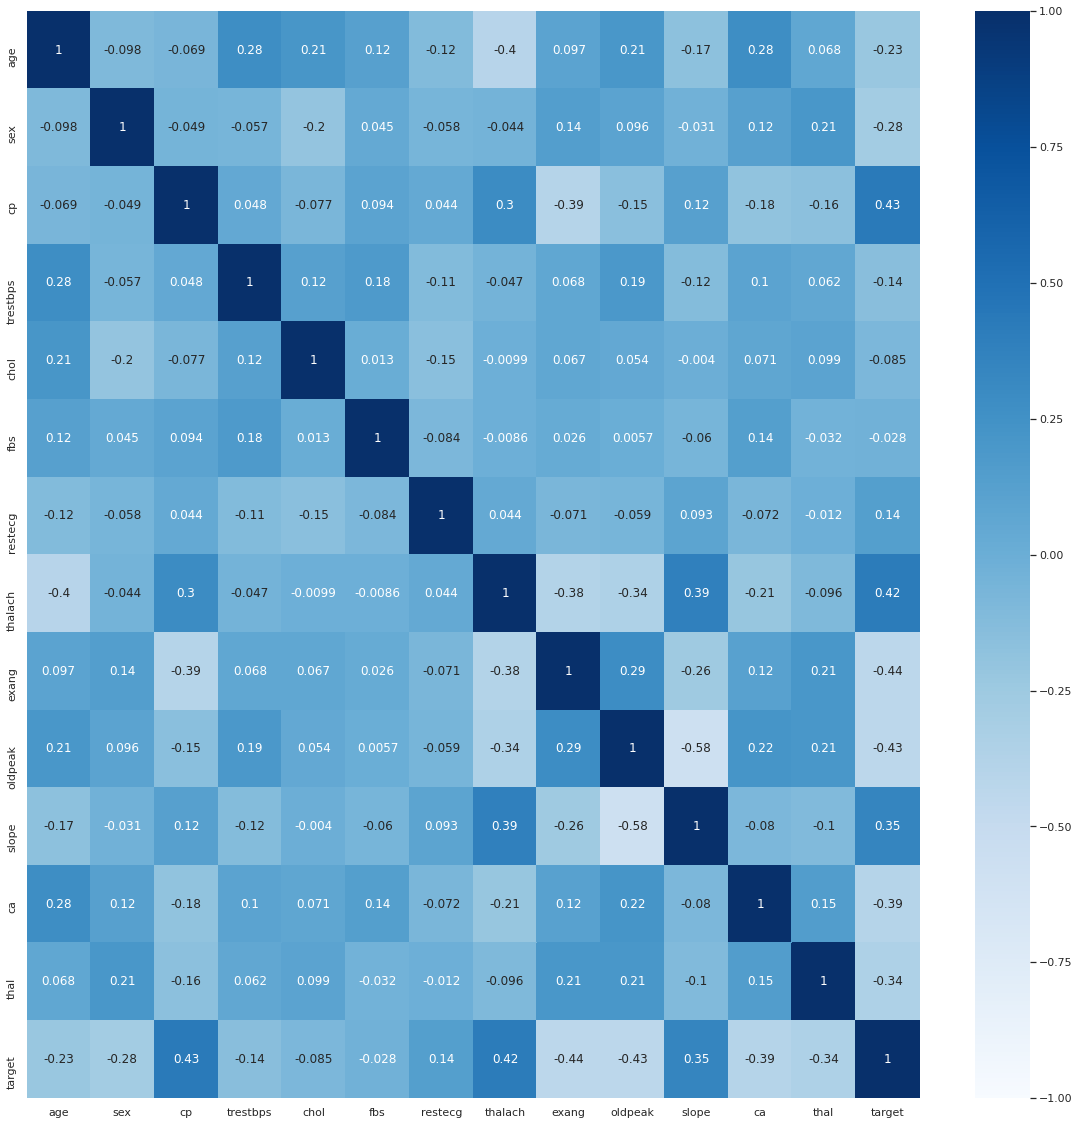

In [ ]:
plt.figure(figsize=(20, 20));
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='Blues');

### Modeling

In [ ]:
X = df.drop('target', axis=1)
X = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

#### Logistic Regression

In [ ]:
pipe_lr = Pipeline([
                    ('ss', StandardScaler()),
                    ("lr", LogisticRegression(max_iter=500))
])

pipe_lr_params = {
  'lr__penalty': ['elasticnet'],
  'lr__solver': ['saga'],
  'lr__l1_ratio': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1],
  'lr__random_state': [1]
}

gs_lr = GridSearchCV(
    pipe_lr,
    param_grid = pipe_lr_params,
    cv = 5
)

In [ ]:
gs_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=500,
                                                           multi_class='auto',
                  

In [ ]:
gs_lr.best_score_

0.8473639455782314

In [ ]:
gs_lr.best_estimator_.score(X_train, y_train)

0.859504132231405

In [ ]:
gs_lr.best_estimator_.score(X_test, y_test)

0.8360655737704918

In [ ]:
gs_lr.best_params_

{'lr__l1_ratio': 1e-05,
 'lr__penalty': 'elasticnet',
 'lr__random_state': 1,
 'lr__solver': 'saga'}

#### Support Vector Machine

In [ ]:
svc_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('svc', SVC())
])

svc_pipe_params = {
    'svc__gamma': ['scale'],
    'svc__C': [c**0.01 for c in range(1, 1001, 25)]
}



In [ ]:
svc_gs = GridSearchCV(svc_pipe, param_grid=svc_pipe_params, cv=5)

In [ ]:
svc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001,...

In [ ]:
svc_gs.best_score_

0.8185374149659864

In [ ]:
svc_gs.best_estimator_.score(X_train, y_train)

0.9090909090909091

In [ ]:
svc_gs.best_estimator_.score(X_test, y_test)

0.819672131147541

#### Random Forest

In [ ]:
rf_pipe = Pipeline([
    ('rf', RandomForestClassifier())
])

rf_pipe_params = {
    'rf__n_estimators': [10, 30, 50, 70, 100, 130, 150],
    'rf__max_depth': [2, 3, 4, 5, 6, 7],
    'rf__min_samples_leaf': [1, 2, 3, 5, 7, 10]
}

In [ ]:
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_pipe_params, cv=5)

In [ ]:
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                               

In [ ]:
rf_gs.best_score_

0.8433673469387755

In [ ]:
rf_gs.best_estimator_.score(X_train, y_train)

0.9049586776859504

In [ ]:
rf_gs.best_estimator_.score(X_test, y_test)

0.8032786885245902

In [ ]:
rf_gs.best_params_

{'rf__max_depth': 4, 'rf__min_samples_leaf': 1, 'rf__n_estimators': 100}

#### LightGBM

In [ ]:
lgbm_pipe = Pipeline([
  ('lgbm', lgb.LGBMClassifier(silent=False))
])

lgbm_pipe_params = {
    "lgbm__max_depth": [1, 5, 7, 10, 20, 25, 50, 75],
    "lgbm__learning_rate" : [0.001, 0.01, 0.05, 0.1],
    "lgbm__num_leaves": [10, 30, 60, 90, 100, 300, 900, 1200],
    "lgbm__n_estimators": [10, 30, 50, 70, 100, 130, 150, 200]
}

In [ ]:
lgbm_gs = GridSearchCV(lgbm_pipe, param_grid=lgbm_pipe_params, cv=5)

In [ ]:
lgbm_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lgbm',
                                        LGBMClassifier(boosting_type='gbdt',
                                                       class_weight=None,
                                                       colsample_bytree=1.0,
                                                       importance_type='split',
                                                       learning_rate=0.1,
                                                       max_depth=-1,
                                                       min_child_samples=20,
                                                       min_child_weight=0.001,
                                                       min_split_gain=0.0,
                                                       n_estimators=100,
                                                       n_jobs=-1, num_leaves=31,
                                   

In [ ]:
lgbm_gs.best_score_

0.8392006802721088

In [ ]:
lgbm_gs.best_estimator_.score(X_train, y_train)

0.8677685950413223

In [ ]:
lgbm_gs.best_estimator_.score(X_test, y_test)

0.8360655737704918

In [ ]:
lgbm_gs.best_params_

{'lgbm__learning_rate': 0.05,
 'lgbm__max_depth': 1,
 'lgbm__n_estimators': 200,
 'lgbm__num_leaves': 10}

#### Neural Network

In [ ]:
n_input = X_train.shape[1]

nn = Sequential()
nn.add(Dense(256, input_dim=n_input, activation='relu'))
nn.add(Dropout(0.1))
nn.add(Dense(256, activation='relu'))
nn.add(Dropout(0.1))
nn.add(Dense(128, activation='relu'))
nn.add(Dropout(0.1))
nn.add(Dense(64, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

change_lr = ReduceLROnPlateau(factor=0.8, patience=10)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, restore_best_weights=False)

In [ ]:
nn_history = nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[change_lr])

Epoch 1/500
8/8 [==============================] - 1s 52ms/step - loss: 6.3740 - acc: 0.5758 - val_loss: 0.9306 - val_acc: 0.5246
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 2.3325 - acc: 0.5541 - val_loss: 0.9772 - val_acc: 0.5246
Epoch 3/500
8/8 [==============================] - 0s 5ms/step - loss: 1.7097 - acc: 0.5039 - val_loss: 1.6777 - val_acc: 0.4590
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 1.3640 - acc: 0.5206 - val_loss: 0.8307 - val_acc: 0.6557
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 1.2855 - acc: 0.5792 - val_loss: 0.8703 - val_acc: 0.5574
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 0.9854 - acc: 0.6313 - val_loss: 1.0526 - val_acc: 0.5410
Epoch 7/500
8/8 [==============================] - 0s 5ms/step - loss: 1.0865 - acc: 0.5329 - val_loss: 0.8198 - val_acc: 0.6557
Epoch 8/500
8/8 [==============================] - 0s 5ms/step - loss: 0.8373 - acc: 0.6417 - va

In [ ]:
nn_history.history['acc'][-1], nn_history.history['val_acc'][-1]

(0.8595041036605835, 0.8196721076965332)

### Model Score




|  | Best training score | Test score | |
|:---------|:---------|:---------| |
|**Logistic regression** | 0.847 | 0.836 |
|**Support Vector Machine** | 0.818 | 0.819 |
|**Random Forest** | 0.843 | 0.803 |
|**Lightgbm** | 0.839 | 0.836 |
|**Neural Network** | 0.864 | 0.819 |


From the table above, the lightgbm model was chosen for the best model because the difference between the training and the testing score was relatively small and the testing score is also the highest.

### Receiver Operatorating Characteristic Curve (ROC Curve)

If you want to predict the heart attack posibilities, you might want to detect as many people as possible even if they do not have any heart disease problem. ROC curve shows the relationship between the true positive rate and false positive rate when you change the threshold of the prediction. When you want to  increase the true positive rate, the false positive rate also increases because you lower the predictive threshold. 

In [ ]:
# Calculate the true positive and the false positive
y_score = lgbm_gs.best_estimator_.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_score)

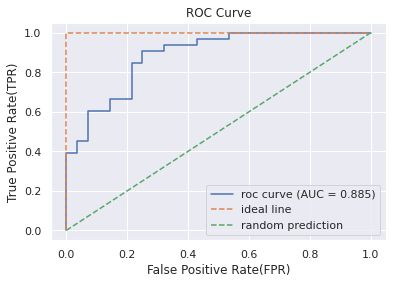

In [ ]:
plt.plot(fpr,tpr,label='roc curve (AUC = %0.3f)' % auc(fpr,tpr))
plt.plot([0,0,1], [0,1,1], linestyle='--', label='ideal line')
plt.plot([0, 1], [0, 1], linestyle='--', label='random prediction')
plt.legend()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.show()

From the ROC Curve, the false positive rate is about 0.3 even if the true positive rate is about 0.9. This is still a good point of compromise to set the threshold if you would not like to miss many people who are actually likely to have a heart attack

### Conclusion

- The best model was the lightgbm with 0.836 testing score.
- Data processing might improve the model (ex. transform 'age' into categorical data).
- The model's prediction threshold should be tuned for your objection.